# Tarea 5

**Envío del PR inicial:** 15 de octubre

**Aceptación del PR:** 21 de octubre

NOTA: Esta tarea debe entregarse en equipo.

## 1

Llamemos $c_n$ el valor del parámetro $c$ donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)=x^2+c$, donde la órbita de periodo $2^n$ nace. Como hemos visto en notebooks anteriores, tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$, $c_1=-1/4$ corresponde a la aparición del atractor de periodo $2^1=2$, $c_2=-3/4$ a la aparición del atractor de periodo $2^2=4$, etc. 

A partir de estos valores y otros que calcularán (al menos deben encontrar $c_6$), definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

La pregunta es, ¿a qué valor converge esta secuencia?, es decir, dar una estimación de $f_\infty$.


*Hint:* Para realizar este ejercicio deben calcular el atractor para varios valores de $c$, de tal manera que puedan aislar las órbitas de periodo $2^p$ y de ahí determinar varios valores $c_n$. Se requerir suficiente cuidado para obtener una buena aproximación de $c_n$. 
Una opción se basa en recordar/usar que las bifurcaciones de doblamiento de periodo ocurren cuando los puntos de la órbita de periodo $p$ se tornan en repulsores, es decir, $(Q_c^p)'(x)=-1$. Esta opción, entonces, involucra obtener los valores $c_n$ a partir de órbitas periódicas de periodo $2^n$ usando los polinomios $Q_c^{2^p}(x)$ y diferenciación automática.

In [1]:
using LaTeXStrings

Utilizaremos un par de funciones correspondientes al notebook 6.

In [82]:
"""
    ciclosestables!(xx, f, cc, nit, nout)

Esta función itera el mapeo `f`, de una variable, `nit+nout` veces, 
usando como condición inicial `x0=0`; los últimos `nout` iterados 
actualizan al vector `xx` que tiene longitud `nout`. `cc` es el valor
del parámetro del mapeo `f`. El mapeo `f` debe ser definido de 
tal manera que `f(x0, cc)` tenga sentido. La idea es que los últimos 
`nout` iterados reflejen los ciclos estables del mapeo `f`.
"""
function ciclosestables!(xx, f, cc, nit, nout)
    @assert (nit > 0) && (nout > 0)
    
    # Primeros nit iterados
    x0 = 0 #π/2
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0
    end
    
    nothing
end

ciclosestables!

In [83]:
"""
    diag_bifurc(f, nit, nout, crange)

Itera el mapeo `f` `nit+nout` veces y regresa una matriz
cuya columna `i` tiene los últimos `nout` iterados del mapeo
para el valor del parámetro del mapeo `crange[i]`.

La función `f` debe ser definida de tal manera que `f(x0, c)` 
tenga sentido.
"""
function diag_bifurc(f, nit, nout, crange)
#     xx = Vector{Float64}(nout)
    ff = Array{Float64,2}(nout, length(crange))
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(view(ff, :, ic), f, c, nit, nout)
#         ff[:,ic] = xx
    end
    
    return ff
end

diag_bifurc

In [4]:
Qc(x,c) = x^2 + c

crange = 0.25:-1/2^10:-2.0

ff = diag_bifurc(Qc, 100000, 256, crange); 
cc = ones(size(ff, 1)) * crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));

In [5]:
using PyPlot

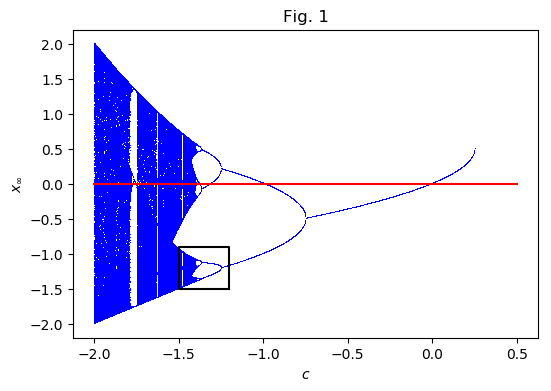

PyObject Text(0.5,1,'Fig. 1')

In [193]:
figure(figsize=(6,4))
plot(cc, ff, "b,")
plot([-1.2,-1.5,-1.5,-1.2,-1.2], [-1.5,-1.5,-0.9,-0.9,-1.5], "k-")
plot([-2,0.5], [0.0,0.0], "r-")
xlabel(L"c")
ylabel(L"x_\infty")
title("Fig. 1")

Para $c_1$=-0.25

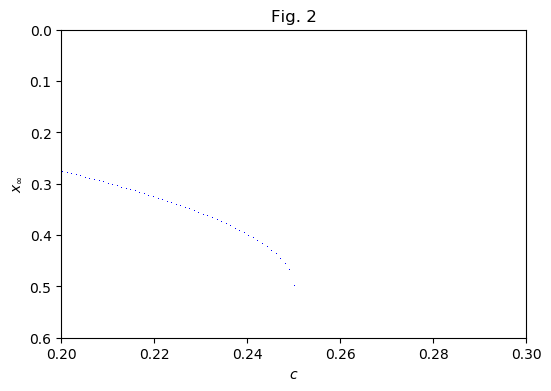

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000335ED4A8>

In [7]:
figure(figsize=(6,4))
plot(cc, ff, "b,")
xlabel(L"c")
ylabel(L"x_\infty")

xlim(0.20,0.30)
ylim(0.6,0)
plot([-1.35,-1.425,-1.425,-1.35,-1.35],
     [-1.425,-1.425,-1.33,-1.33,-1.425], "k-")

Para $c_1$= - 0.75:

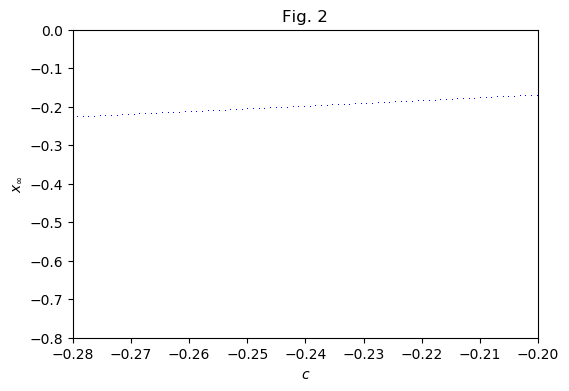

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000348F29E8>

In [8]:
figure(figsize=(6,4))
plot(cc, ff, "b,")
xlabel(L"c")
ylabel(L"x_\infty")
title("Fig. 2")
xlim(-0.28,-0.20)
ylim(-0.8,0)
plot([-1.35,-1.425,-1.425,-1.35,-1.35],
     [-1.425,-1.425,-1.33,-1.33,-1.425], "k-")

A continuación se hace un zoom:

Para $c_2$= - 1.25 :

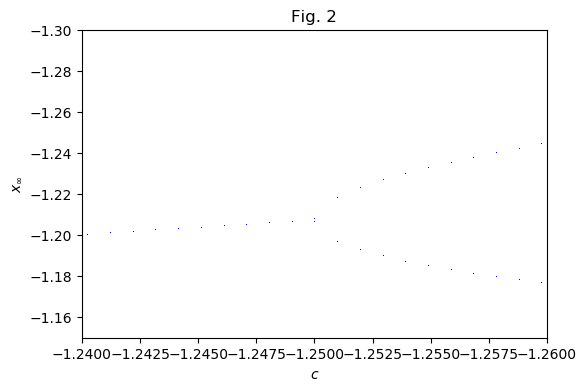

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000038E38978>

In [9]:

figure(figsize=(6,4))
plot(cc, ff, "b,")
xlabel(L"c")
ylabel(L"x_\infty")
title("Fig. 2")
xlim(-1.24,-1.26)
ylim(-1.150,-1.3)
plot([-1.35,-1.425,-1.425,-1.35,-1.35],
     [-1.425,-1.425,-1.33,-1.33,-1.425], "k-")

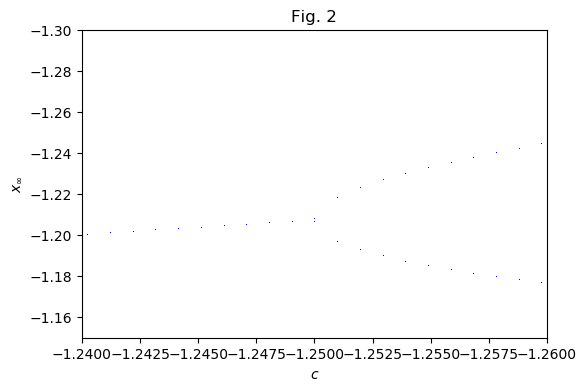

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003594ABE0>

In [10]:
figure(figsize=(6,4))
plot(cc, ff, "b,")
xlabel(L"c")
ylabel(L"x_\infty")
title("Fig. 2")
xlim(-1.24,-1.26)
ylim(-1.150,-1.3)
plot([-1.35,-1.425,-1.425,-1.35,-1.35],
     [-1.425,-1.425,-1.33,-1.33,-1.425], "k-")

Primero agreguemos un par de herramientas:

In [6]:
import Base: +, -,*,/,sin

In [7]:
struct Dual
    x  :: Float64
    x′ :: Float64
end

In [8]:
dual(x0::Real) = Dual(x0, 1)

dual (generic function with 1 method)

In [23]:
+(u::Dual, v::Dual) = Dual( u.x + v.x, u.x′ + v.x′)
+(a::Real, u::Dual) = Dual( a + u.x, u.x′)
+(u::Dual, a::Real) = Dual( a + u.x, u.x′)

-(u::Dual, v::Dual) = Dual( u.x - v.x, u.x′ - v.x′)
-(u::Real, v::Dual) = Dual( u - v.x, - v.x′)
-(u::Dual, v::Real) = Dual( u.x - v, u.x′ )

*(u::Dual, v::Dual) = Dual( u.x * v.x, u.x * v.x′ + u.x′ * v.x)
*(u::Real, v::Dual) = Dual( u * v.x, u * v.x′ )
*(u::Dual, v::Real) = Dual( u.x * v, u.x′ * v)

function /(u::Dual, v::Dual)
    y = u.x / v.x
    Dual( y, (u.x′ - y * v.x′)/v.x )
end

function /(u::Real, v::Dual)
    y = u / v.x
    Dual( y, -(u*v.x′)/(v.x)^2 )
end
function /(u::Dual, v::Real)
    y = u.x / v
    Dual( y, (u.x′)/v )
end

sin(u::Dual)=Dual(sin(u.x*π/180),u.x′*cos(u.x * π/180))

sin (generic function with 11 methods)

In [90]:
"""Esta función nos permite obtener una buena aproximación del valor de c para el cuál ocurre el doblamiento de periodo, tomando como
   parámetro la función, el intervalo dentro del que se encuentra el doblamiento de periodo y "p", el número de iteraciones."""


function doblamiento_periodo(f,c,p)
    mapeo = diag_bifurc(f, 1000000, p, c)
    contador = 1
   
    h = dual(mapeo[1,contador])
    
    
    for b in mapeo
      if(h.x′ > -1)
        contador += 1
        h = dual(mapeo[1,contador])
        for k in 1:p
            h = f(h, c[contador])
        end
      end      
        if(h.x′ <= -1)
            return c[contador]
            break
           
        end
    
    end
end

doblamiento_periodo

Conforme c decrece, existe una sucesión de bifurcaciones de doblamiento de periodo. Que aparecen en el orden: $1, 2, 4, 8,..., 2^n, ...$

In [91]:
Q(x,c)=x^2+c

Q (generic function with 1 method)

In [92]:
doblamiento_periodo(Q,-1.24:-1/10^4:-1.26,2)

-1.25

In [77]:
doblamiento_periodo(Q,-1.36:-1/10^5:-1.37,4)

-1.3681

In [78]:
doblamiento_periodo(Q,-1.391:-1/10^6:-1.395,8)

-1.394046

In [79]:
doblamiento_periodo(Q,-1.395:-1/10^6:-1.4,16)

-1.399632

In [117]:
doblamiento_periodo(Q,-1.4:-1/10^6:-1.405,32)

-1.400829

In [93]:
doblamiento_periodo(Q,-1.3901:-1/10^6:-1.42,64)

-1.401168

Entonces: $c_0=  0.25 ,c_1= - 0.75, c_2= - 1.25, c_3= - 1.3681, c_4= - 1.394046, c_5= -1.399632, c_6= -1.400829., c_7= -1.401168$

Definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

In [82]:
function fn(cn,cn1,cn2)
fn=(cn-cn1)/(cn1-cn2)
end

fn (generic function with 1 method)

In [83]:
fn(0.25,-0.75,-1.25)

2.0

In [86]:
fn(-0.75,-1.25,- 1.3681)

4.233700254022012

In [87]:
fn(-1.25,- 1.3681,- 1.394046)

4.551761350497225

In [110]:
C=[0.25,-0.75,-1.25,- 1.3681,- 1.394046,-1.399632,-1.400829,-1.401168]

for i in 1:6
    A=fn(C[i],C[i+1],C[i+2])
    println(A)
end

2.0
4.233700254022012
4.551761350497225
4.644826351593158
4.666666666666296
3.5309734513291553


Esta secuencia de números converge a la llamada constante de Feigenbaum: $ 4.669201609... $ .Usualmente también es expresada como:

$ \delta = lim_{n-> \infty} \frac{a_{n-1}  \ - \ a_{n-2}}{a_n \ - \ a_{n-1}} = 4.669201609... $

Sorprendentemente, este límite es el mismo para cualquier familia de mapeos unidimensionales con un solo parámetro. Dicho de otro modo esta constante es universal en el sentido de que aplica para una variedad de sistemas dinámicos.

## 2

Repitan el ejercicio anterior para el mapeo $S_c(x) = c \sin(x)$. 

- ¿Cómo se comparan los valores obtenidos de $f_n$? 

- ¿Qué interpretación le pueden dar a este resultado, en comparación del ejercicio anterior?

In [37]:
Sc(x,c)=c*sin(x)

crange = 0:1/2^10:5

ff = diag_bifurc(Sc, 100000, 256, crange); 
cc = ones(size(ff, 1)) * crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff, 1)*size(ff, 2));
cc = reshape(cc, size(ff));

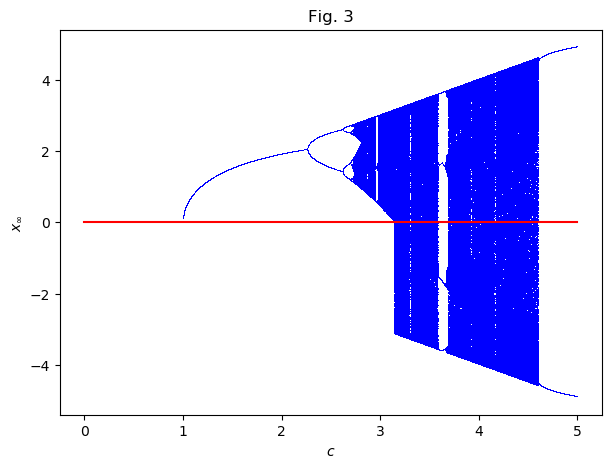

PyObject Text(0.5,1,'Fig. 3')

In [38]:
figure(figsize=(7,5))
plot(cc, ff, "b,")
#plot([-1.2,-1.5,-1.5,-1.2,-1.2], [-1.5,-1.5,-0.9,-0.9,-1.5], "k-")
plot([0,5],[0.0,0.0], "r-")
xlabel(L"c")
ylabel(L"x_\infty")
title("Fig. 3")

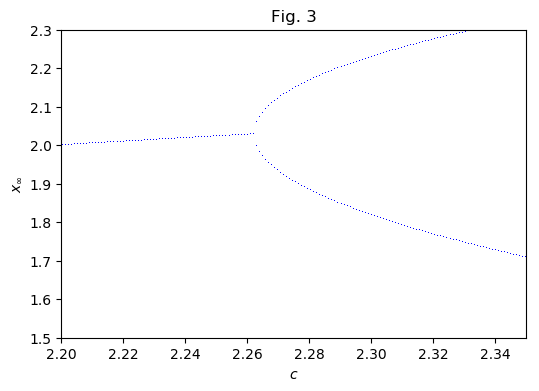

(1.5, 2.3)

In [39]:
figure(figsize=(6,4))
plot(cc, ff, "b,")
xlabel(L"c")
ylabel(L"x_\infty")
title("Fig. 3")
xlim(2.2,2.35)
ylim(1.5,2.3)
#plot([-1.35,-1.425,-1.425,-1.35,-1.35],
 #    [-1.425,-1.425,-1.33,-1.33,-1.425], "k-")

In [94]:
Sc(x,c)=c*sin(x)


Sc (generic function with 1 method)

In [95]:
doblamiento_periodo(Sc,2.25:1/10^4:2.27,2)

LoadError: [91mBoundsError: attempt to access 2×201 Array{Float64,2} at index [1, 202][39m

Entonces: $c_0=  1.0 ,c_1= 2.26, c_2= , c_3= , c_4= , c_5= , c_6= , c_7= $

De igual modo, definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde:

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

## 3

Como se ve en la Fig. 1 del diagrama de bifurcaciones de $Q_c$, $x=0$ pertenece a un ciclo de periodo $2^n$ para ciertos valores $C_n$ del parámetro. Dichos valores son *especiales*, ya que el hecho de que $x=0$ pertenezca a un ciclo de periodo $2^n$ define los llamados *ciclos superestable*, donde tenemos $(Q^{2^p}_{C_n})'(0)=0$.

- ¿A qué converge la secuencia $f_n$, definida ahora a partir de los valores $C_n$.

- De los $2^p$ puntos del ciclo de periodo $2^p$, es decir, $\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia a 0 es la menor; a esa distancia la identificaremos como $d_n$. Calcular numéricamente a qué converge la secuencia $d_n/d_{n+1}$.